In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import dataframe_image as dfi
from IPython.display import Image

# Data

In [5]:
df = pd.read_csv("/Users/joshsteinbecker/jts_project/Data/Structural Biology/Amino Acids/AminoAcid_Data.csv")
print(list(df.columns))

['id', 'code', 'full name', 'R', 'composition', 'mass']


In [11]:
df['nlen'] = [len(x) for x in df['full name']]
mass = df['mass']
df1 = df.style.format({
   "mass": "{:.1f} Da"
}).background_gradient(subset=['nlen'],cmap='viridis')
dfi.export(df1,"DF1.png")
df1

/Users/joshsteinbecker/Library/Python/3.8/lib/python/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0525/112100.295293:INFO:headless_shell.cc(660)] Written to file /var/folders/sz/0lyp_0wx3mgdzpg0t_hg1zh40000gn/T/tmp_vacaczm/temp.png.


,id,code,full name,R,composition,mass,nlen
0,W,Trp,Tryptophan,NaN,C11H10N2O,186.21,10
1,Y,Tyr,Tyrosine,-Ph-OH,C9H9NO2,163.17,8
2,R,Arg,Arginine,NaN,C6H12N4O,156.19,8
3,F,Phe,Phenylalanine,NaN,C9H9NO,147.18,13
4,H,His,Histidine,NaN,C6H7N3O,137.14,9
5,M,Met,Methionine,NaN,C5H9NOS,131.20,10
6,E,Glu,Glutamic Acid,NaN,C5H7NO3,129.12,13
7,K,Lys,Lysine,NaN,C6H12N2O,128.17,6
8,Q,Gln,Glutamine,NaN,C5H8N2O2,128.13,9
9,D,Asp,Aspartic Acid,NaN,C4H5NO3,115.09,13


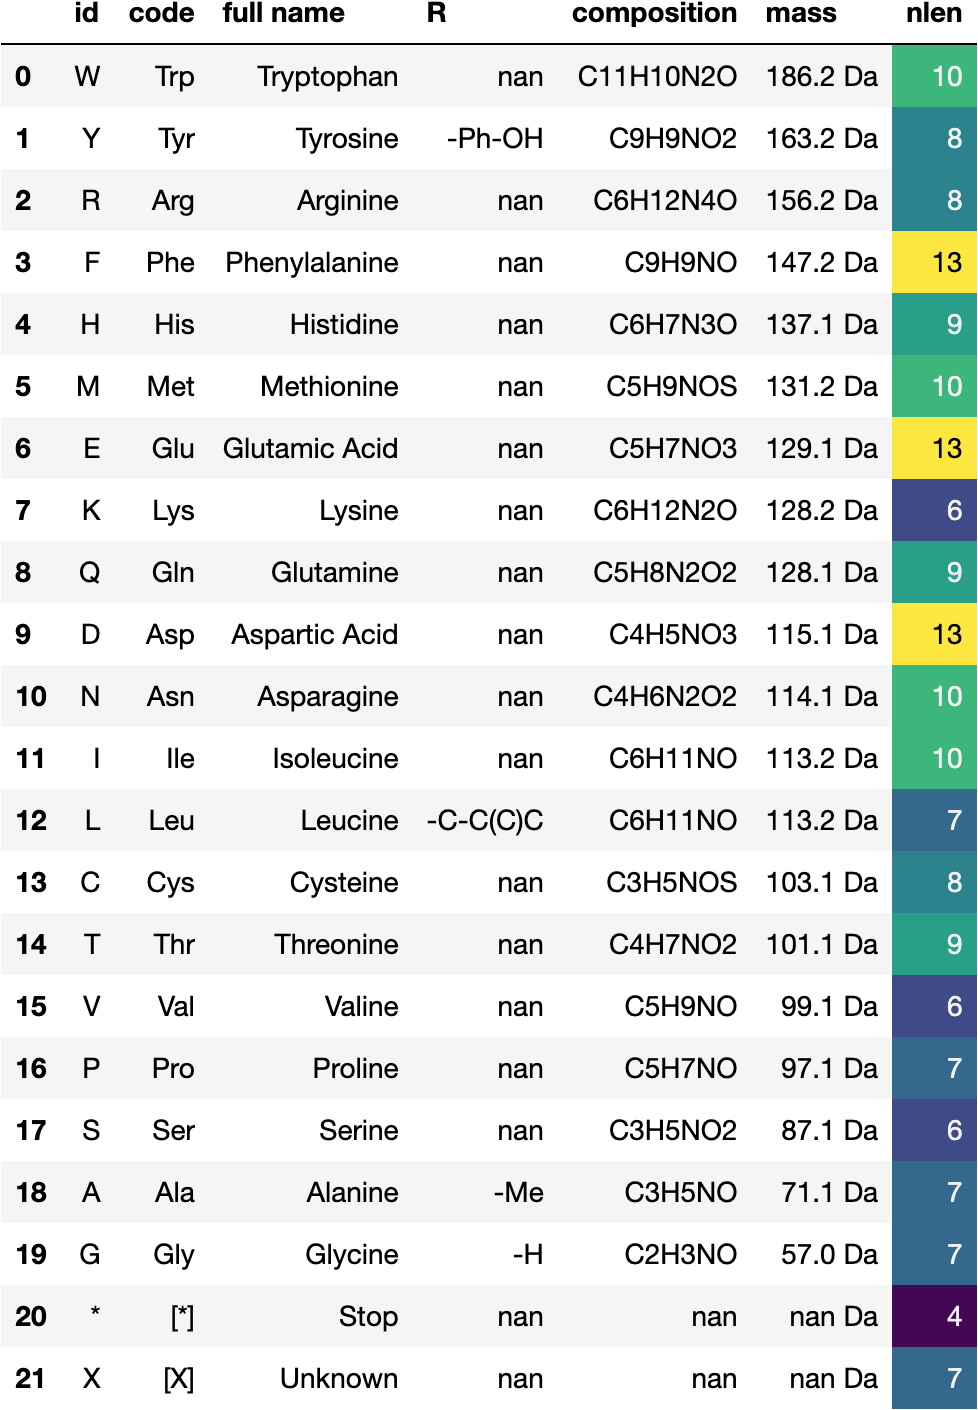

In [12]:
Image("DF1.png",height=600)

In [15]:
df['ct_C'] = (df.composition.str.extract("(C\d*)"))
df['ct_O'] = (df.composition.str.extract("(O\d*)")) 
df['ct_N'] = (df.composition.str.extract("(N\d*)"))
df['ct_H'] = (df.composition.str.extract("(H\d*)"))
df['rank'] = df['mass'].rank(ascending=False)
df2 = df.style.background_gradient(subset=['rank'],cmap='copper').format({"rank":"{:g}","mass": "{:.1f} Da"})
df2

,id,code,full name,R,composition,mass,nlen,ct_C,ct_O,ct_N,ct_H,rank
0,W,Trp,Tryptophan,nan,C11H10N2O,186.2 Da,10,C11,O,N2,H10,1
1,Y,Tyr,Tyrosine,-Ph-OH,C9H9NO2,163.2 Da,8,C9,O2,N,H9,2
2,R,Arg,Arginine,nan,C6H12N4O,156.2 Da,8,C6,O,N4,H12,3
3,F,Phe,Phenylalanine,nan,C9H9NO,147.2 Da,13,C9,O,N,H9,4
4,H,His,Histidine,nan,C6H7N3O,137.1 Da,9,C6,O,N3,H7,5
5,M,Met,Methionine,nan,C5H9NOS,131.2 Da,10,C5,O,N,H9,6
6,E,Glu,Glutamic Acid,nan,C5H7NO3,129.1 Da,13,C5,O3,N,H7,7
7,K,Lys,Lysine,nan,C6H12N2O,128.2 Da,6,C6,O,N2,H12,8
8,Q,Gln,Glutamine,nan,C5H8N2O2,128.1 Da,9,C5,O2,N2,H8,9
9,D,Asp,Aspartic Acid,nan,C4H5NO3,115.1 Da,13,C4,O3,N,H5,10


/Users/joshsteinbecker/Library/Python/3.8/lib/python/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0525/112408.546849:INFO:headless_shell.cc(660)] Written to file /var/folders/sz/0lyp_0wx3mgdzpg0t_hg1zh40000gn/T/tmpixy433gv/temp.png.


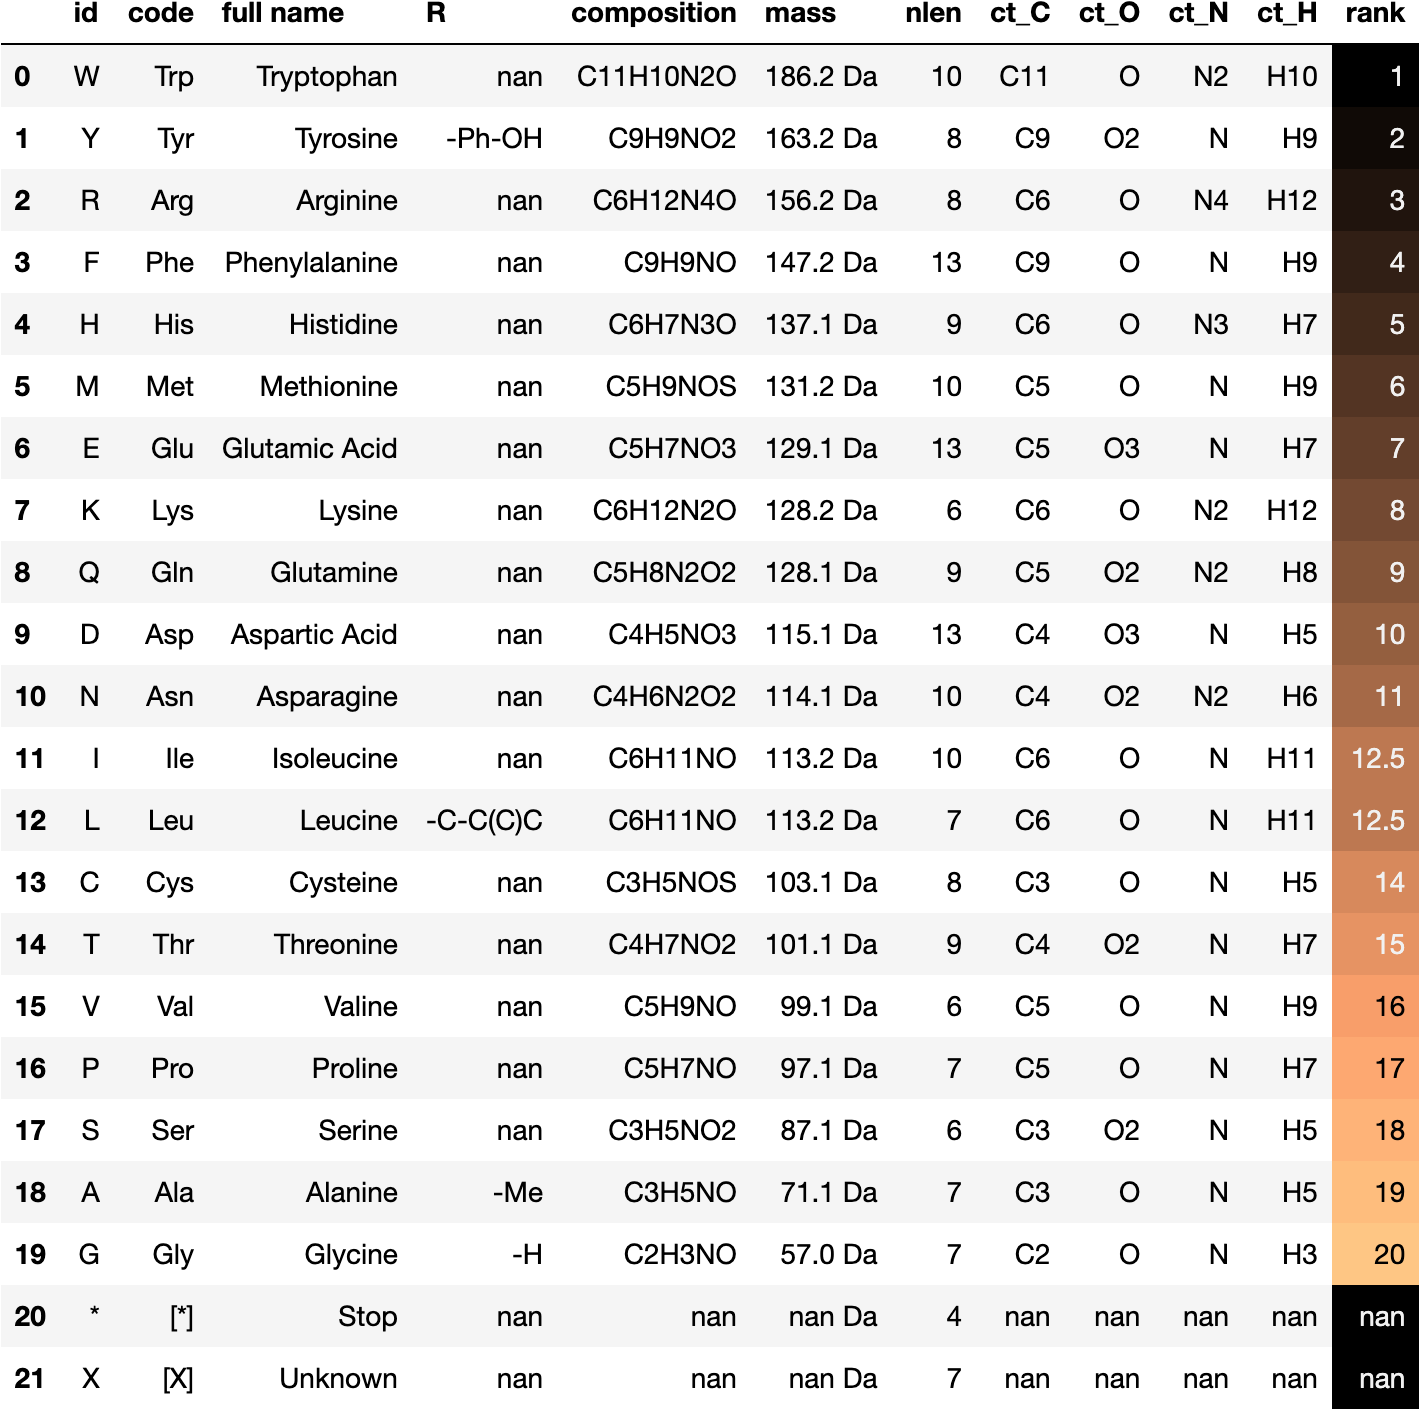

In [19]:
dfi.export(df2,"DF2.png")
Image("DF2.png",height=500)

In [10]:
xyline = np.linspace(min(df.nlen),max(df.nlen),int(max(mass)))
# xyline is a line that bisects the xy plane across the x=y coords

# Section: Meaningless Correlations
With the provided dataset, draw a correlation that has no use or causal relationships with each other.

## Mass vs Name Length of amino acids

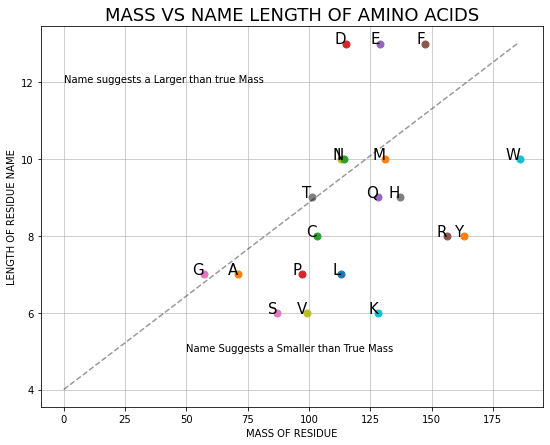

In [13]:

plt.figure(figsize=(9,7))
plt.grid(linewidth = 0.6)
# plt.scatter(mass,nlen, c=df["letter"])
groups = df.groupby("id")
for name, group in groups:
    plt.plot(group["mass"],group["nlen"], marker="o", linestyle="", label=name,markersize=7)
    plt.annotate(name,(group["mass"],group["nlen"]),fontsize=15,ha='right')
# for x,y in zip(df["average mass"],df["nlen"]):
#    label = f'{df["letter"]}'
#    plt.annotate(label,(df['average mass'],df['nlen']))
#plt.legend()
plt.plot(xyline,linestyle='--',color='black',alpha=0.4)
plt.xlabel('MASS OF RESIDUE')
plt.ylabel('LENGTH OF RESIDUE NAME')
plt.annotate('Name Suggests a Smaller than True Mass',(50,5))
plt.annotate('Name suggests a Larger than true Mass',(0,12))
plt.title('MASS VS NAME LENGTH OF AMINO ACIDS',fontsize=18)
plt.show()

# Amino Acids by Mass

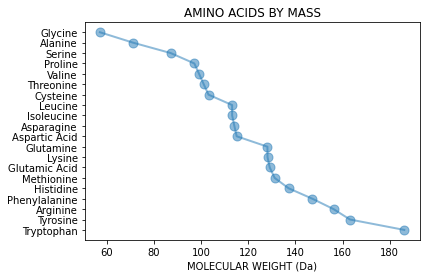

In [17]:
plt.plot(df['mass'],df['full name'],marker = 'o',markersize = 9,linewidth=2 ,alpha=0.5)

plt.xlabel("MOLECULAR WEIGHT (Da)")
plt.title("AMINO ACIDS BY MASS")
plt.show()

In [1]:
!pip3 install markdown

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 KB 1.2 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
